In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
benign=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.gafgyt.udp.csv')
# m_a=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.mirai.ack.csv')
# m_sc=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.mirai.scan.csv')
# m_sy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/1/1.mirai.syn.csv')
# # m_u=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udp.csv')
# # m_u_p=pd.read_csv('/content/drive/MyDrive/iot-dataset/1/1.mirai.udpplain.csv')

In [4]:
benign['type']='benign'
# m_u['type']='attack'
g_c['type']='combo'
g_j['type']='junk'
g_s['type']='scan'
g_t['type']='tcp'
g_u['type']='udp'
# m_a['type']='ack'
# m_sc['type']='mirai.scan'
# m_sy['type']='mirai.syn'
# # m_u_p['type']='attack'

In [5]:
data=pd.concat([benign,g_c,g_j,g_s,g_t,g_u],
               axis=0, sort=False, ignore_index=True)

In [6]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign


In [7]:
data.groupby('type')['type'].count()

type
benign     49548
combo      59718
junk       29068
scan       29849
tcp        92141
udp       105874
Name: type, dtype: int64

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [10]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 29068), ('combo', 29068), ('junk', 29068), ('scan', 29068), ('tcp', 29068), ('udp', 29068)]


In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(174408, 115, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [15]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM


In [16]:
#Create model
model = Sequential()
model.add(LSTM(40, activation='relu',input_shape=(115,1,),return_sequences=True))    # the batch size is neglected!
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 115, 40)           6720      
                                                                 
 lstm_1 (LSTM)               (None, 115, 16)           3648      
                                                                 
 flatten (Flatten)           (None, 1840)              0         
                                                                 
 dense (Dense)               (None, 128)               235648    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 254,662
Trainable params: 254,662
Non-trai

In [17]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
4361/4361 [==============================] - 401s 91ms/step - loss: 0.3477 - accuracy: 0.7816 - val_loss: 0.2862 - val_accuracy: 0.8088
Epoch 2/10
4361/4361 [==============================] - 397s 91ms/step - loss: 0.2736 - accuracy: 0.8140 - val_loss: 0.2623 - val_accuracy: 0.8239
Epoch 3/10
4361/4361 [==============================] - 398s 91ms/step - loss: 0.2636 - accuracy: 0.8207 - val_loss: 0.2631 - val_accuracy: 0.8212
Epoch 4/10
4361/4361 [==============================] - 397s 91ms/step - loss: 0.2583 - accuracy: 0.8224 - val_loss: 0.2739 - val_accuracy: 0.8195
Epoch 5/10
4361/4361 [==============================] - 397s 91ms/step - loss: 0.2544 - accuracy: 0.8233 - val_loss: 0.2492 - val_accuracy: 0.8261
Epoch 6/10
4361/4361 [==============================] - 396s 91ms/step - loss: 0.2524 - accuracy: 0.8246 - val_loss: 0.2500 - val_accuracy: 0.8259
Epoch 7/10
4361/4361 [==============================] - 396s 91ms/step - loss: 0.2508 - accuracy: 0.8247 - val_loss: 0

In [18]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.8295395906198039
MCC        : 0.8226136581405552


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5852
           1       1.00      0.97      0.98      5831
           2       0.97      1.00      0.98      5797
           3       1.00      1.00      1.00      5842
           4       0.50      1.00      0.67      5815
           5       0.00      0.00      0.00      5745

    accuracy                           0.83     34882
   macro avg       0.74      0.83      0.77     34882
weighted avg       0.75      0.83      0.77     34882



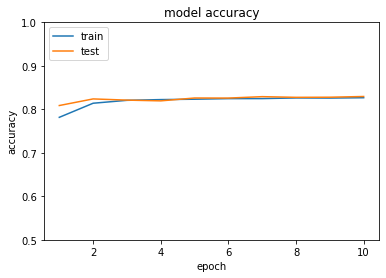

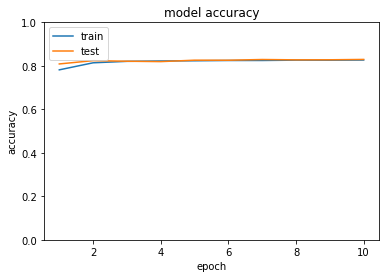

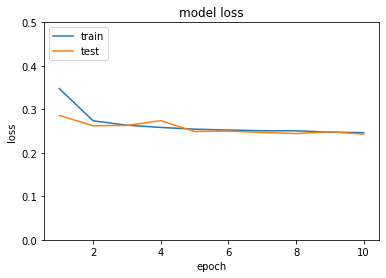

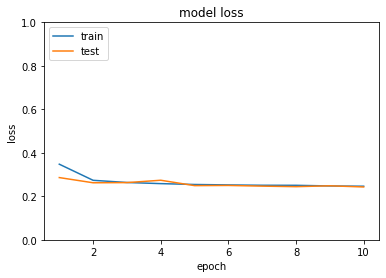

In [21]:
#Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.5, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc , label='Validation accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()




#Loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss , label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

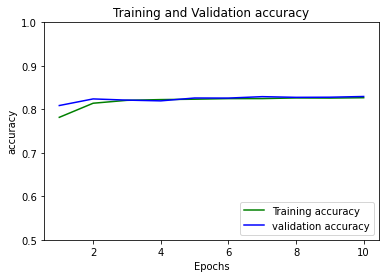

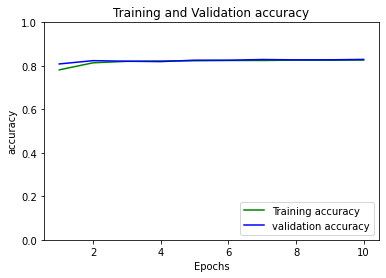

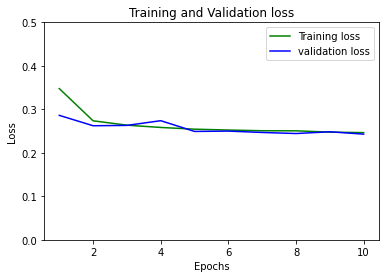

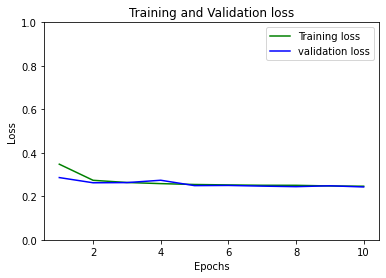

In [22]:
# Accuracy
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


#loss
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='upper right')
plt.show()



plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

[[5852    0    0    0    0    0]
 [   0 5660  171    0    0    0]
 [   1   23 5771    1    1    0]
 [   1    0    0 5841    0    0]
 [   2    0    0    0 5812    1]
 [   1    0    0    0 5744    0]]


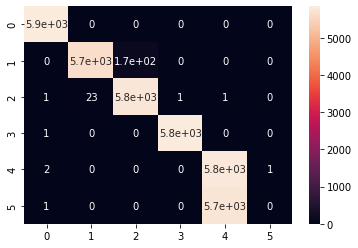

In [23]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)